# About Dataset

*This dataset consists of tv shows and movies available on Netflix as of 2019* 
*The dataset is collected from Flixable which is a third-party Netflix search engine*

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\python projects\Datasets\netflix_titles.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Missing Values

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
missing_values_keys=df.isnull().sum().keys()


***Finding the percentage of missing value***

In [7]:
for key in missing_values_keys:
    if df[key].isnull().any():
        print(f"Missing percentage of value in {key} is --> {round((df[key].isnull().sum()/df.shape[0])*100,2)} %")

Missing percentage of value in director is --> 31.58 %
Missing percentage of value in cast is --> 9.14 %
Missing percentage of value in country is --> 7.64 %
Missing percentage of value in date_added is --> 0.18 %
Missing percentage of value in rating is --> 0.16 %


***Visualising Missing Values using Heatmap***

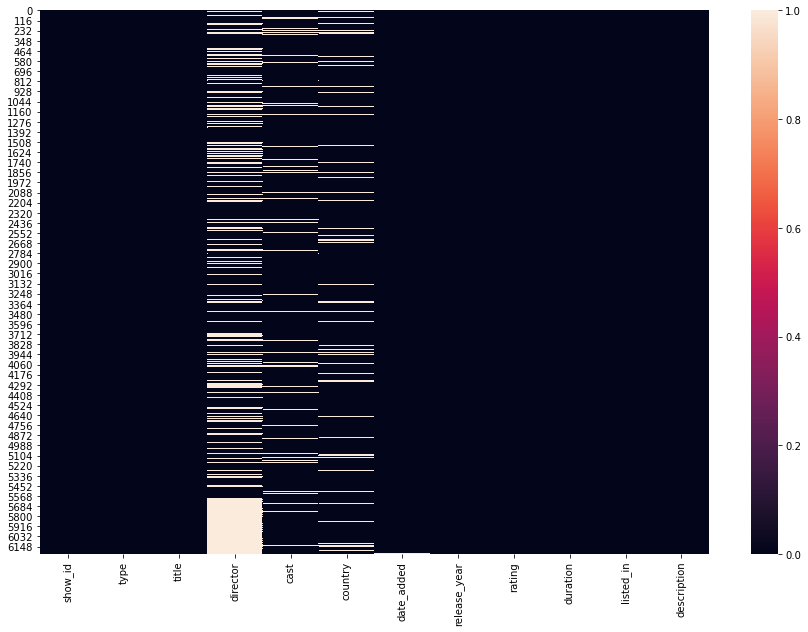

In [8]:
plt.figure(figsize=(15,10))

sns.heatmap(df.isnull())

### Handling Missing values

***filling columns  :  director -->no director , cast--> unknown , country-->unkonwn .***


In [9]:
final_df=df.copy()
final_df["director"].fillna(" no director",inplace=True)
final_df["cast"].fillna(" unknown",inplace=True)
final_df["country"].fillna("unknown",inplace=True)

In [10]:
final_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,no director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,no director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,no director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,no director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,no director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,no director,unknown,unknown,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,no director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


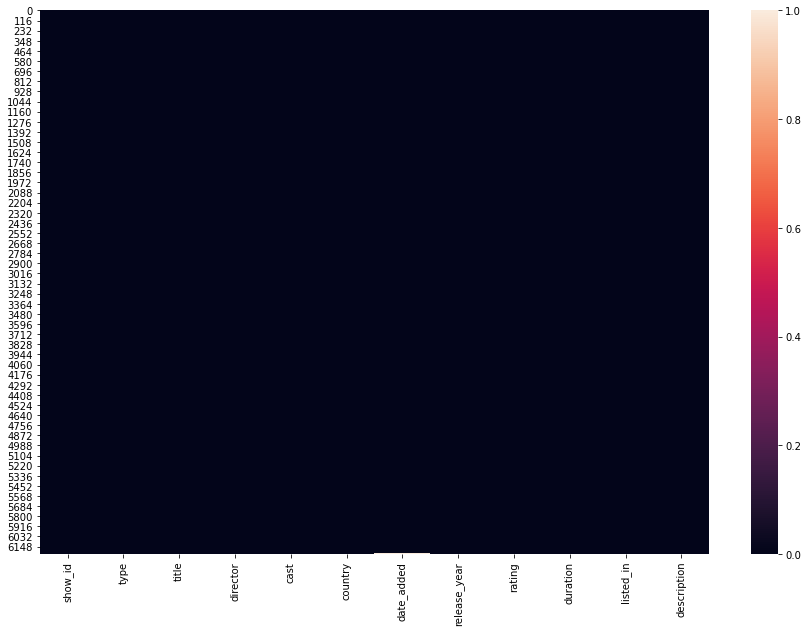

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(final_df.isnull())

**Drpping minute missing values**

In [12]:
final_df.dropna(inplace=True)

In [13]:
final_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
final_df.shape

(6214, 12)

In [15]:
print(f"Number of rows and columns is original dataframe are {df.shape[0]}, {df.shape[1]}")
print(f"Number of rows and columns in modified  dataframe are {final_df.shape[0]}, {final_df.shape[1]}")

Number of rows and columns is original dataframe are 6234, 12
Number of rows and columns in modified  dataframe are 6214, 12


# Exploratory Data Analysis

In [16]:
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,no director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,no director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,no director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Analysis of type

Number of Movies : 4257
Number of TV Shows : 1957



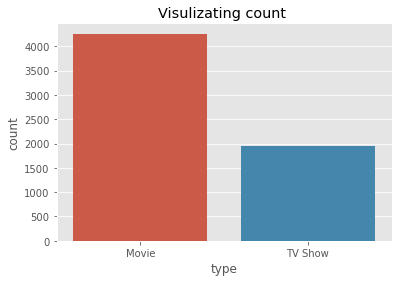

In [17]:
style.use("ggplot")
print(f"Number of Movies : {final_df.type.value_counts()[0]}")
print(f"Number of TV Shows : {final_df.type.value_counts()[1]}")
print()
sns.countplot(x="type",data=final_df)
plt.title("Visulizating count ")
plt.show()

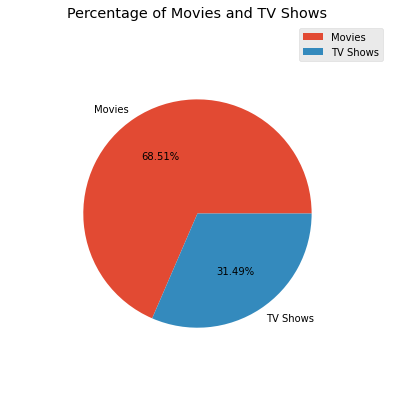

In [18]:
style.use("ggplot")
data_type_count=final_df.type.value_counts()
plt.figure(figsize =(10, 7))
plt.pie(data_type_count,autopct='%1.2f%%' ,labels = ["Movies","TV Shows"],radius=0.75)
plt.title("Percentage of Movies and TV Shows")
plt.legend()
  
# show plot
plt.show()

***From above visulizations, it is clear that Netflix has more content in movies than TV Shows. The contribution of Movie is near 68.51%.***  

## Analysis of Rating

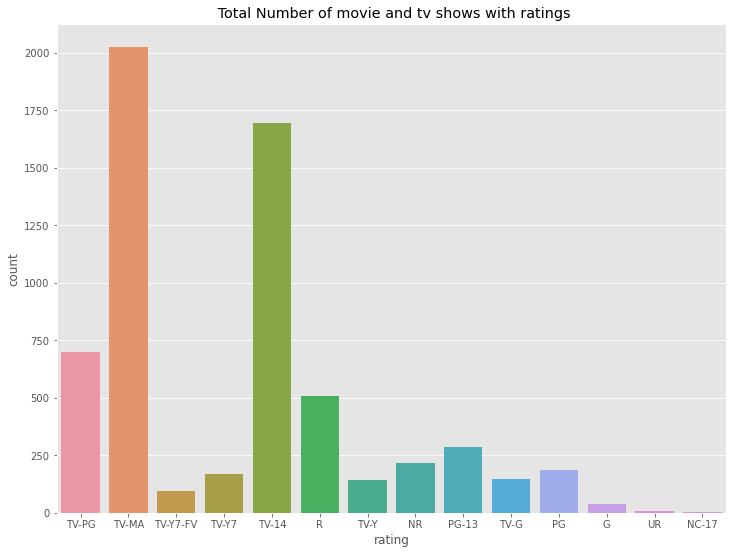

In [19]:
plt.figure(figsize=(12,9))
sns.countplot(x="rating",data=final_df)
plt.title(" Total Number of movie and tv shows with ratings")
plt.show()

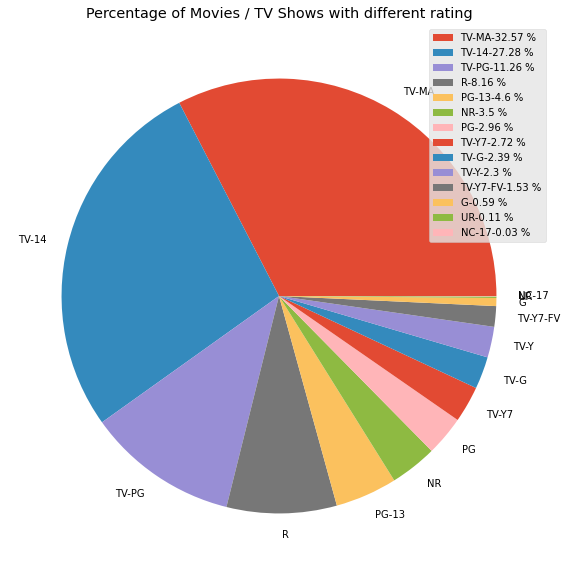

In [20]:
style.use("ggplot")
keys=final_df.rating.value_counts().keys()
per_cent_rating=round(df["rating"].value_counts()/df["rating"].value_counts().sum()*100,2)
label=['{}-{} %'.format(i,j) for i,j in zip(keys,per_cent_rating)]
data_rating_count=final_df.rating.value_counts()
plt.figure(figsize =(10, 10))
plt.pie(data_rating_count,labels =final_df.rating.value_counts().keys(),radius=1)
plt.title("Percentage of Movies / TV Shows with different rating")
plt.legend(labels=label,loc="best")
  
# show plot
plt.show()

In [21]:
movie_df=final_df[final_df['type']=="Movie"]
tv_show_df=final_df[final_df['type']=="TV Show"]

In [22]:
print("Number OF rating in movies")
movie_rating_count=movie_df['rating'].value_counts()
print(movie_rating_count ,end=" " )
print("Number OF rating in Tv Shows")
tv_shows_rating_count=tv_show_df['rating'].value_counts()
tv_shows_rating_count

Number OF rating in movies
TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR             7
NC-17          2
Name: rating, dtype: int64 Number OF rating in Tv Shows


TV-MA       677
TV-14       657
TV-PG       267
TV-Y        101
TV-Y7        99
TV-G         69
TV-Y7-FV     68
NR           15
R             2
PG            1
G             1
Name: rating, dtype: int64

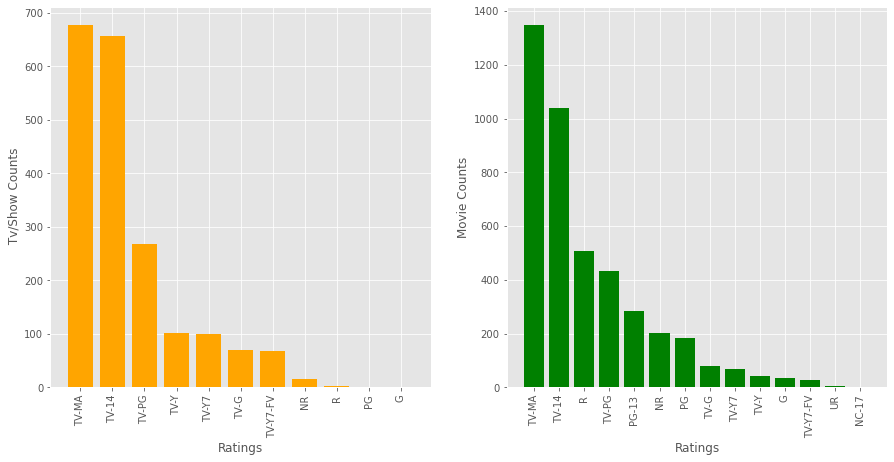

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.bar(tv_shows_rating_count.keys(),tv_shows_rating_count,color="orange")
plt.xlabel("Ratings")
plt.ylabel(" Tv/Show Counts")
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.bar(movie_rating_count.keys(),movie_rating_count,color="green")
plt.xlabel("Ratings")
plt.ylabel("Movie Counts")
plt.xticks(rotation=90)
plt.show()

***Most of Content is Tv-MA & Tv-14.***

**TV-MA: This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.**

***TV-14: This program may be unsuitable for children under 14 years of age. Programs rated TV-14 contain material that parents or adult guardians may find unsuitable for children under the age of 14.***

## Maximum Content Contributing Countries

In [24]:
Countries=final_df.set_index("title")["country"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)

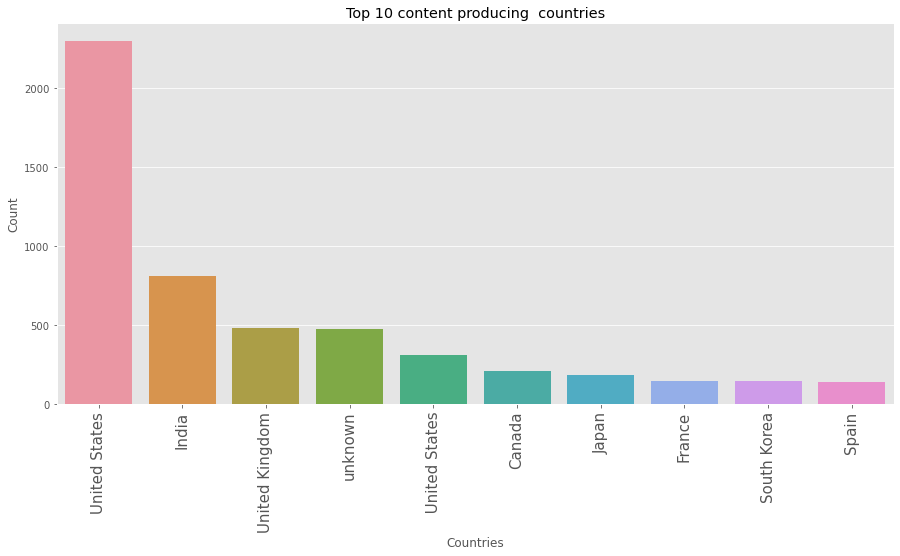

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(Countries.value_counts().keys()[:10],Countries.value_counts()[:10])
plt.ylabel("Count")
plt.xlabel("Countries")
plt.title("Top 10 content producing  countries")
plt.xticks(rotation=90,fontsize=15)
plt.show()

***Wordcloud Showing countries contributing on Netflix.***

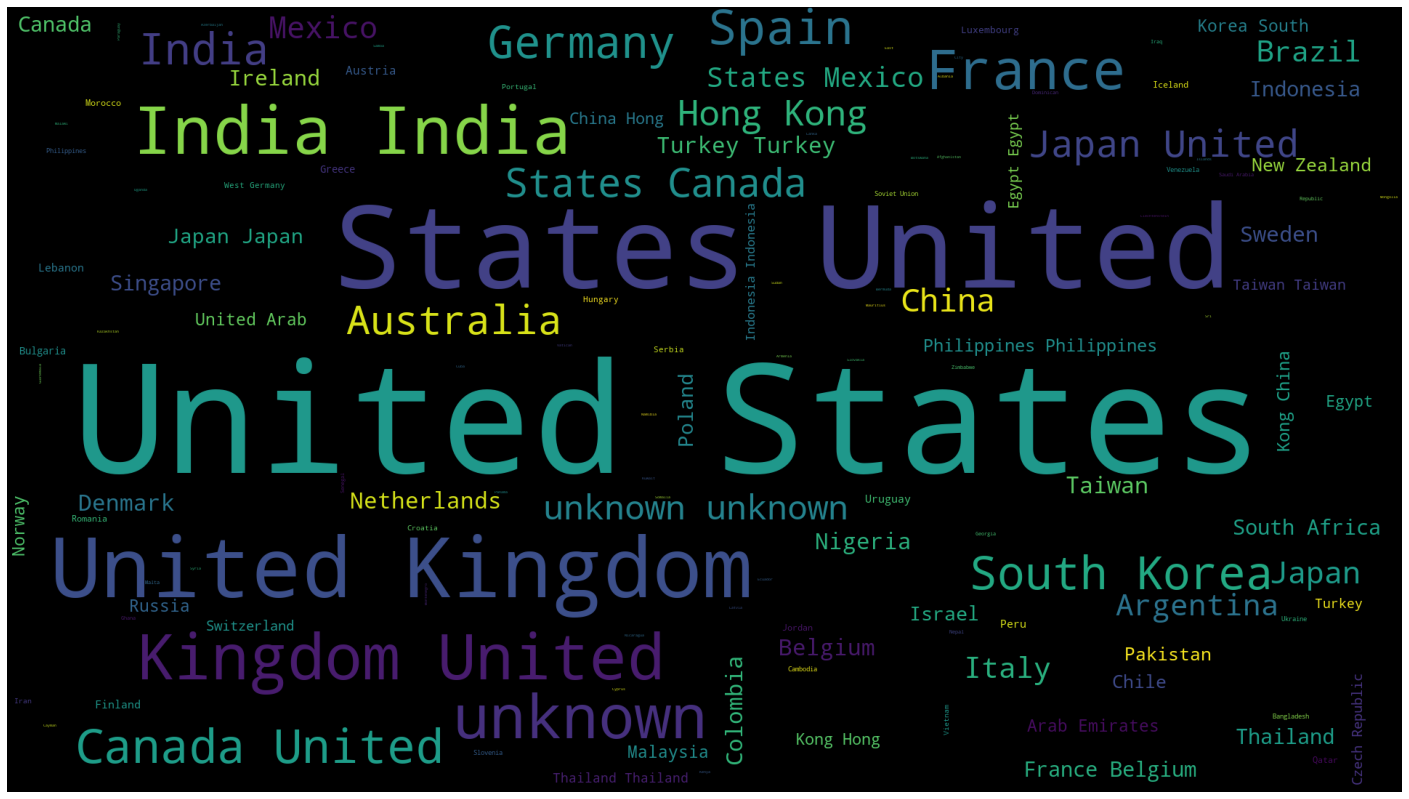

In [26]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(final_df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

***Unites States are the top content contributor over netflix , followed by India and United Kingdom.***

## Content release over last 25 years 

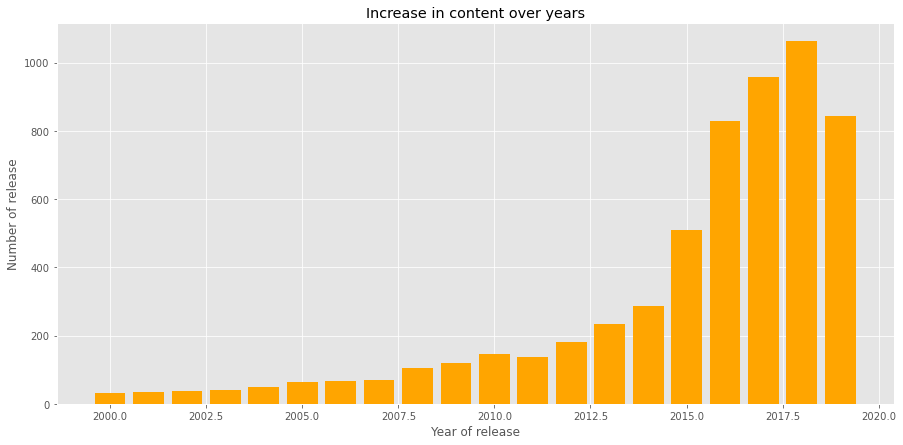

In [27]:
plt.figure(figsize=(15,7))
plt.bar(final_df['release_year'].value_counts().head(20).keys(),final_df['release_year'].value_counts().head(20),color="orange")
plt.title("Increase in content over years")
plt.xlabel("Year of release")
plt.ylabel("Number of release")
plt.show()

## Number of Movies release over years

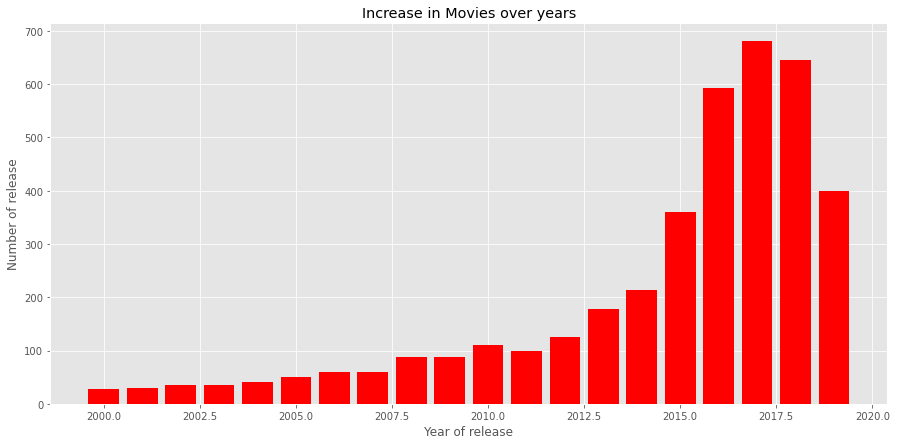

In [28]:
plt.figure(figsize=(15,7))
plt.bar(movie_df['release_year'].value_counts().head(20).keys(),movie_df['release_year'].value_counts().head(20),color="red")
plt.title("Increase in Movies over years")
plt.xlabel("Year of release")
plt.ylabel("Number of release")
plt.show()

## Number of Tv Shows release over years

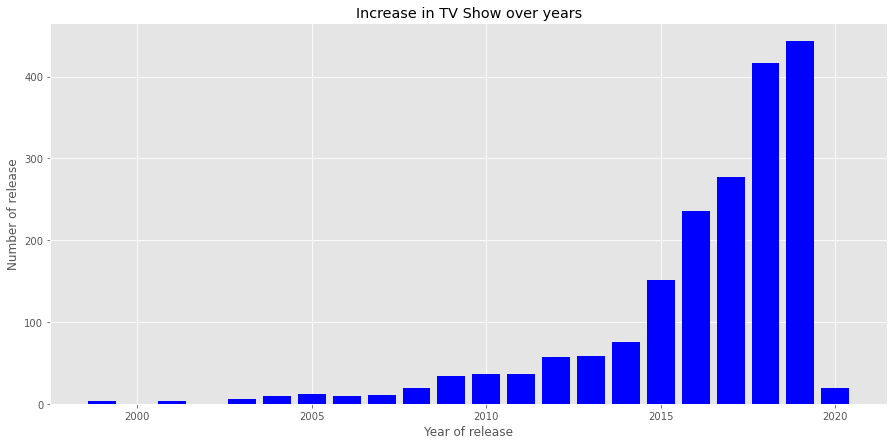

In [29]:
plt.figure(figsize=(15,7))
plt.bar(tv_show_df['release_year'].value_counts().head(20).keys(),tv_show_df['release_year'].value_counts().head(20),color="blue")
plt.title("Increase in TV Show over years")
plt.xlabel("Year of release")
plt.ylabel("Number of release")
plt.show()

## From the plots of Tv Show and Movies, we can see that in recent trends(2016,2017,2018,2019), amount of Tv Shows are increasing at high rate.##

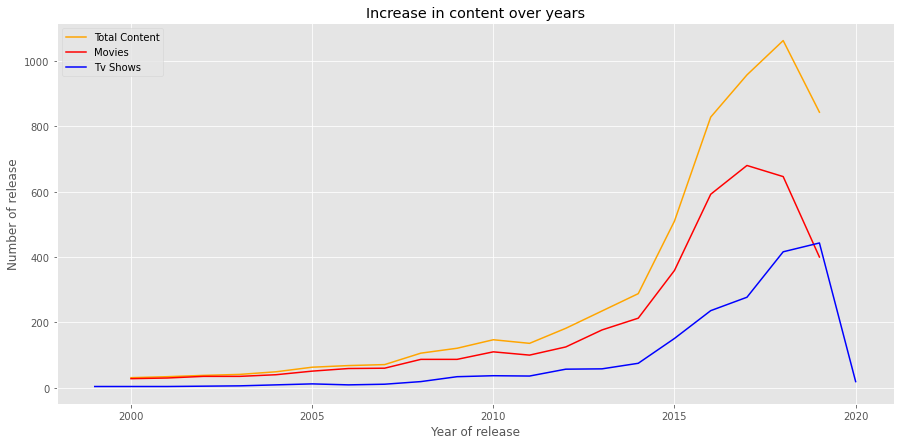

In [30]:
plt.figure(figsize=(15,7))
sns.lineplot(final_df['release_year'].value_counts().head(20).keys(),final_df['release_year'].value_counts().head(20),color="orange",label="Total Content")
sns.lineplot(movie_df['release_year'].value_counts().head(20).keys(),movie_df['release_year'].value_counts().head(20),color="red",label="Movies")
sns.lineplot(tv_show_df['release_year'].value_counts().head(20).keys(),tv_show_df['release_year'].value_counts().head(20),color="blue",label="Tv Shows")
plt.title("Increase in content over years")
plt.xlabel("Year of release")
plt.ylabel("Number of release")
plt.legend()
plt.show()

##  Generes

***All generes on Netflix.***

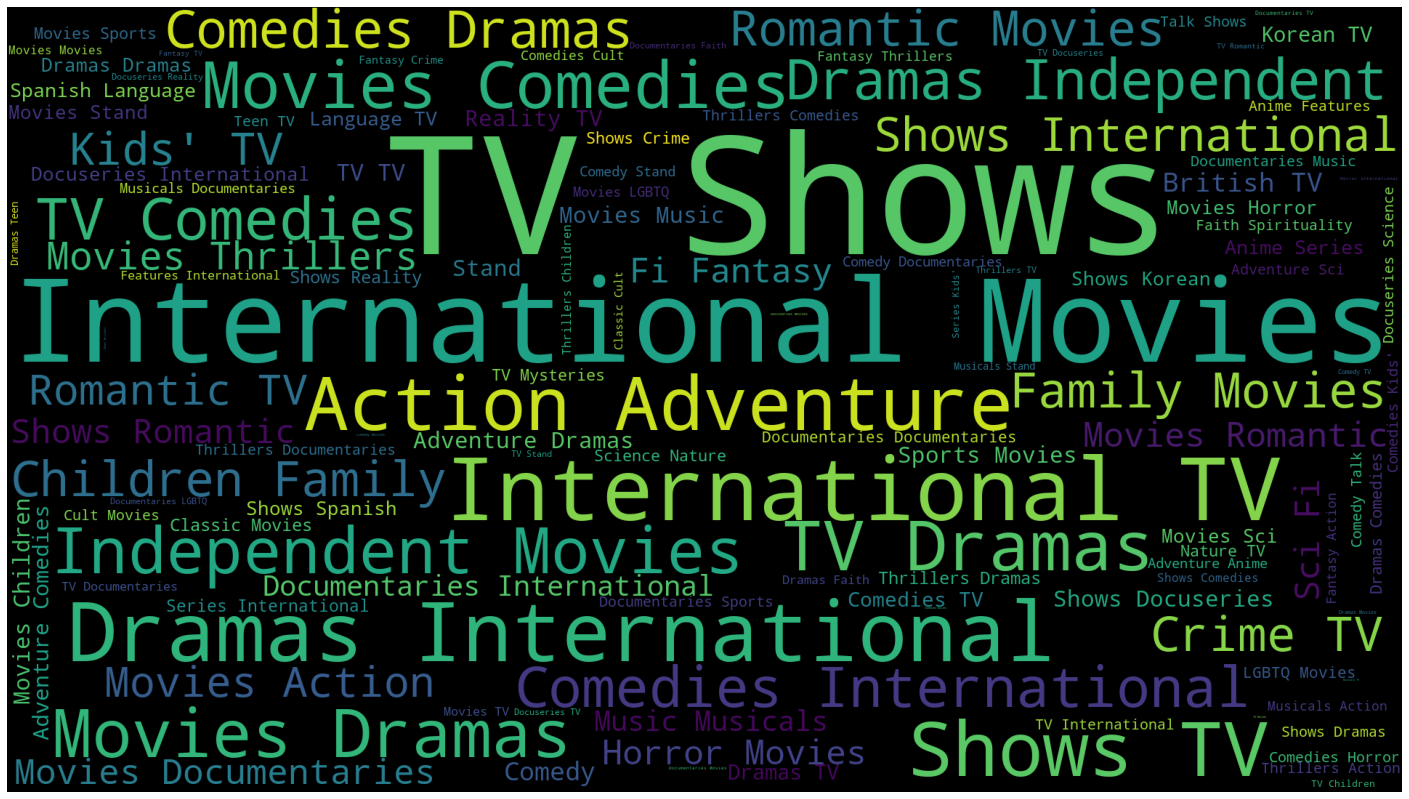

In [31]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(final_df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

## Top Movie Genere 

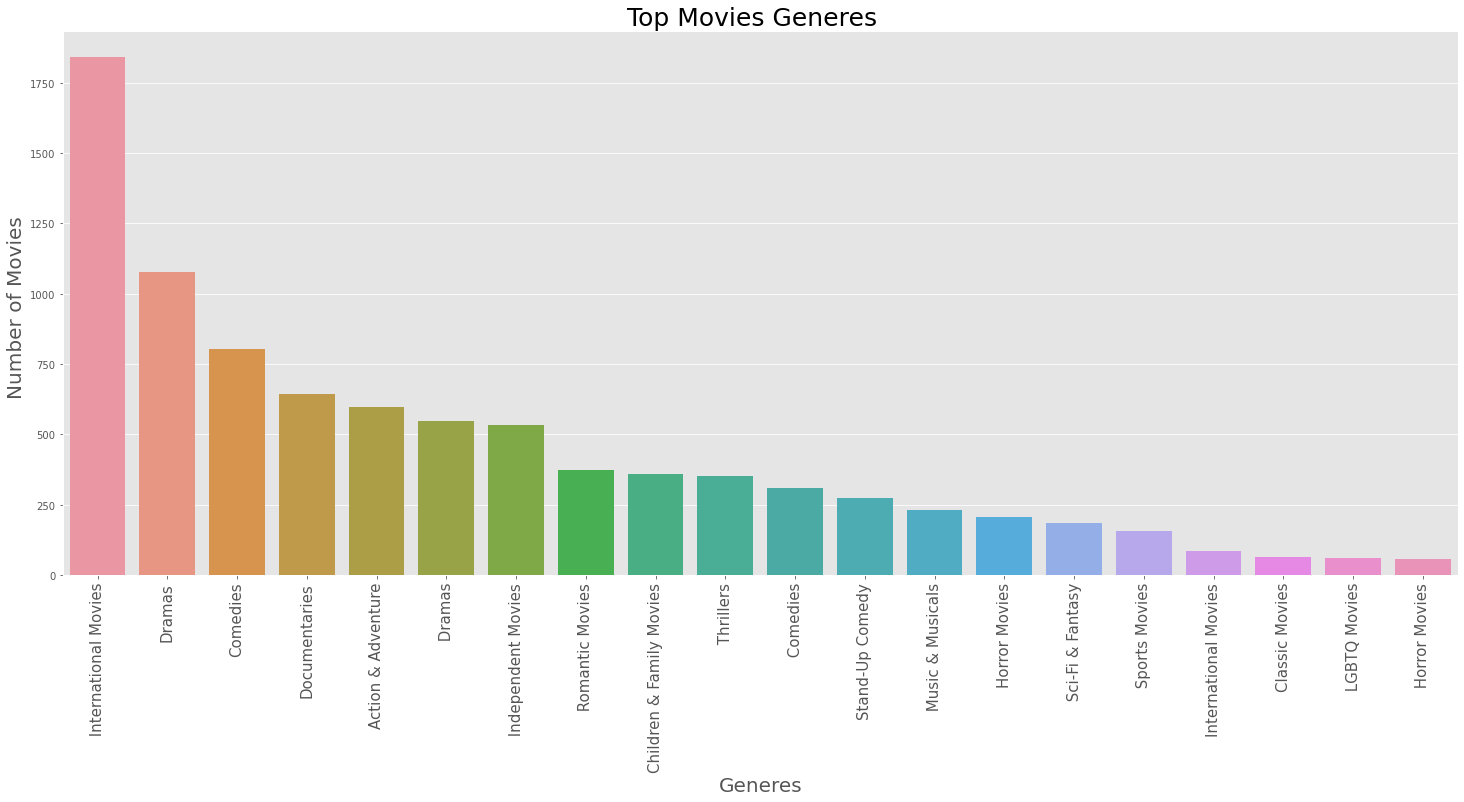

In [32]:
geners=movie_df.set_index("title")["listed_in"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)
geners.value_counts()
plt.figure(figsize=(25,10))
sns.barplot(geners.value_counts().keys()[:20],geners.value_counts()[:20])
plt.xticks(rotation=90,fontsize=15)
plt.title("Top Movies Generes  ",fontsize=25)
plt.xlabel("Generes",fontsize=20)
plt.ylabel("Number of Movies ",fontsize=20)
plt.show()

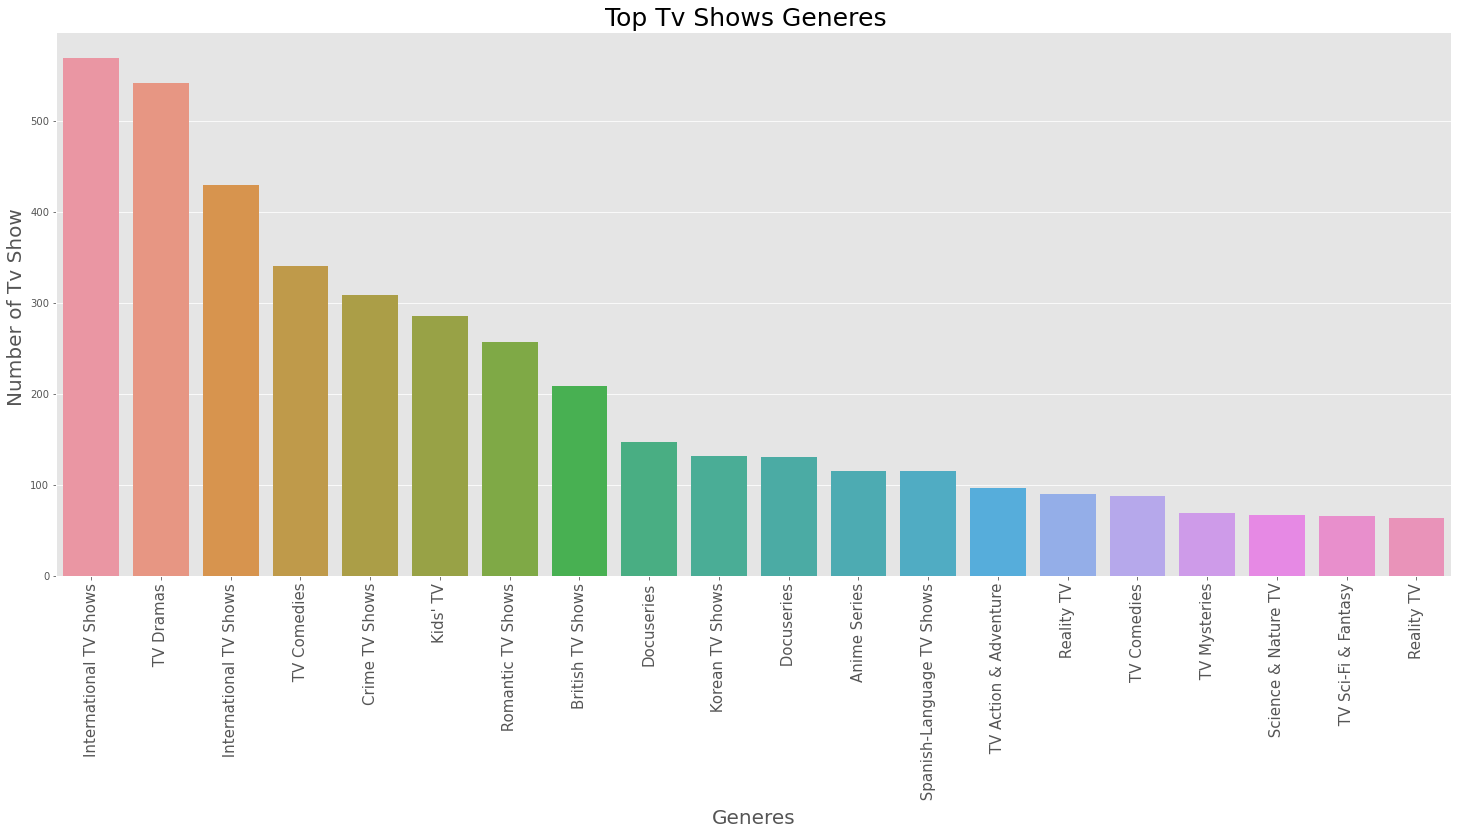

In [33]:
geners=tv_show_df.set_index("title")["listed_in"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)
geners.value_counts()
plt.figure(figsize=(25,10))
sns.barplot(geners.value_counts().keys()[:20],geners.value_counts()[:20])
plt.xticks(rotation=90,fontsize=15)
plt.title("Top Tv Shows Generes  ",fontsize=25)
plt.xlabel("Generes",fontsize=20)
plt.ylabel("Number of Tv Show ",fontsize=20)
plt.show()

### Top Genere among Tv Show and Movies are International Movies / Tv Show   followed by Tv / Movie Drama

## Top 10 directors with most contribution in movie

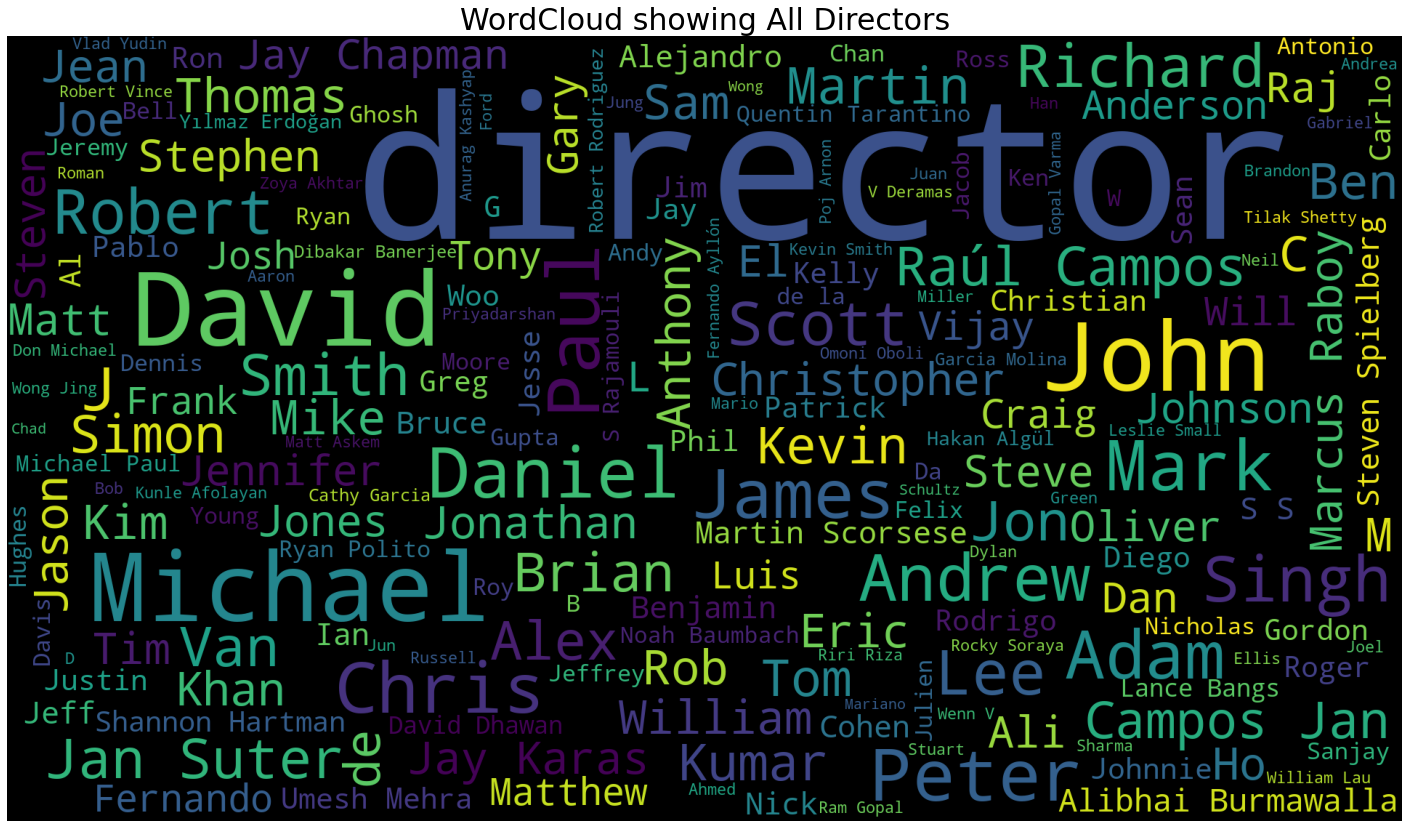

In [34]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(final_df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud showing All Directors",fontsize=30)
plt.savefig('country.png')
plt.show()

In [35]:
movie_directors=movie_df.set_index("title")["director"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)

***No Director is the filled missing value So dropping these value in our analysis***

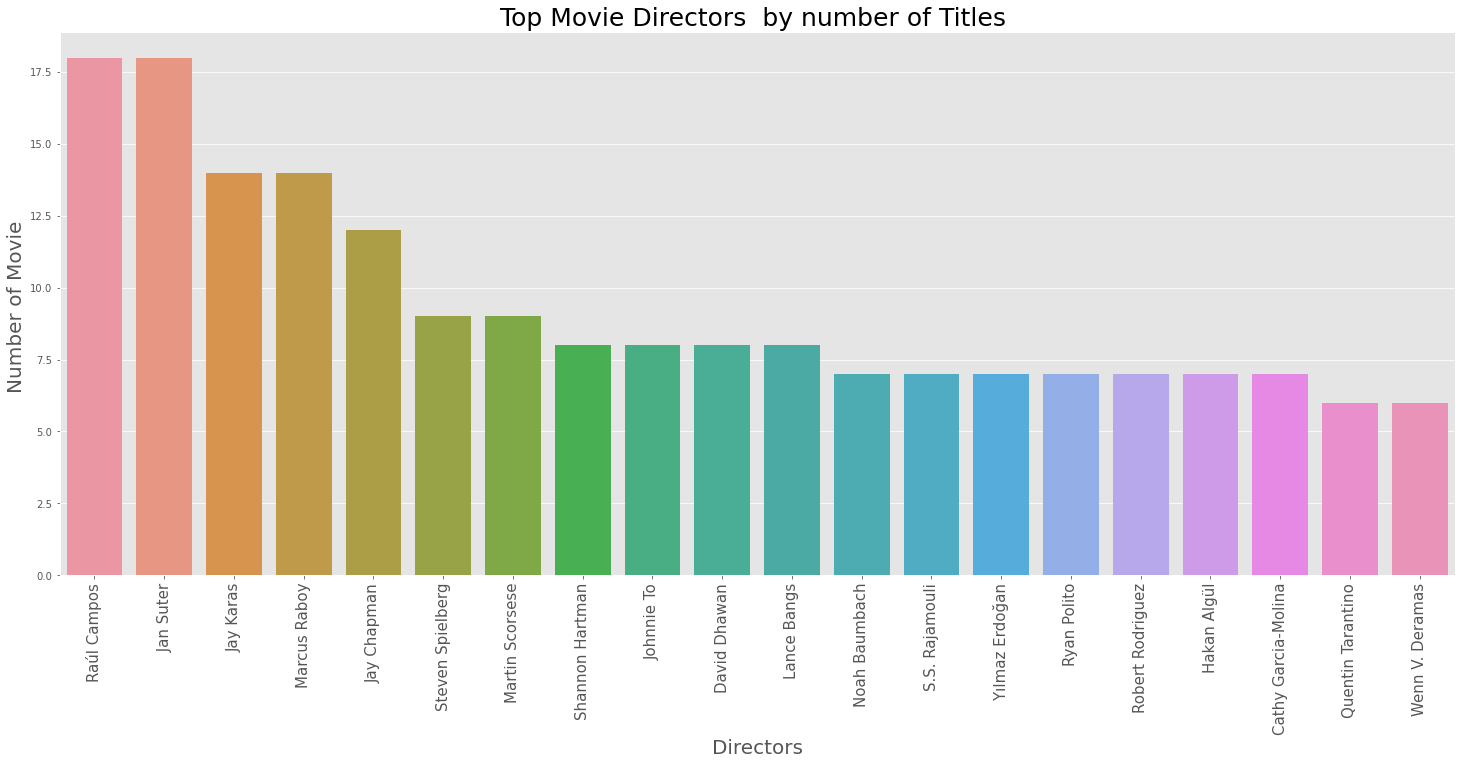

In [36]:
plt.figure(figsize=(25,10))
sns.barplot(movie_directors.value_counts().keys()[1:21],movie_directors.value_counts()[1:21])
plt.xticks(rotation=90,fontsize=15)
plt.title("Top Movie Directors  by number of Titles ",fontsize=25)
plt.xlabel("Directors",fontsize=20)
plt.ylabel("Number of Movie ",fontsize=20)
plt.show()

### Jan Sutler and Raul Campos are most Contributing directors in Movies.

## Top 10 directors with most contribution in Tv/Show

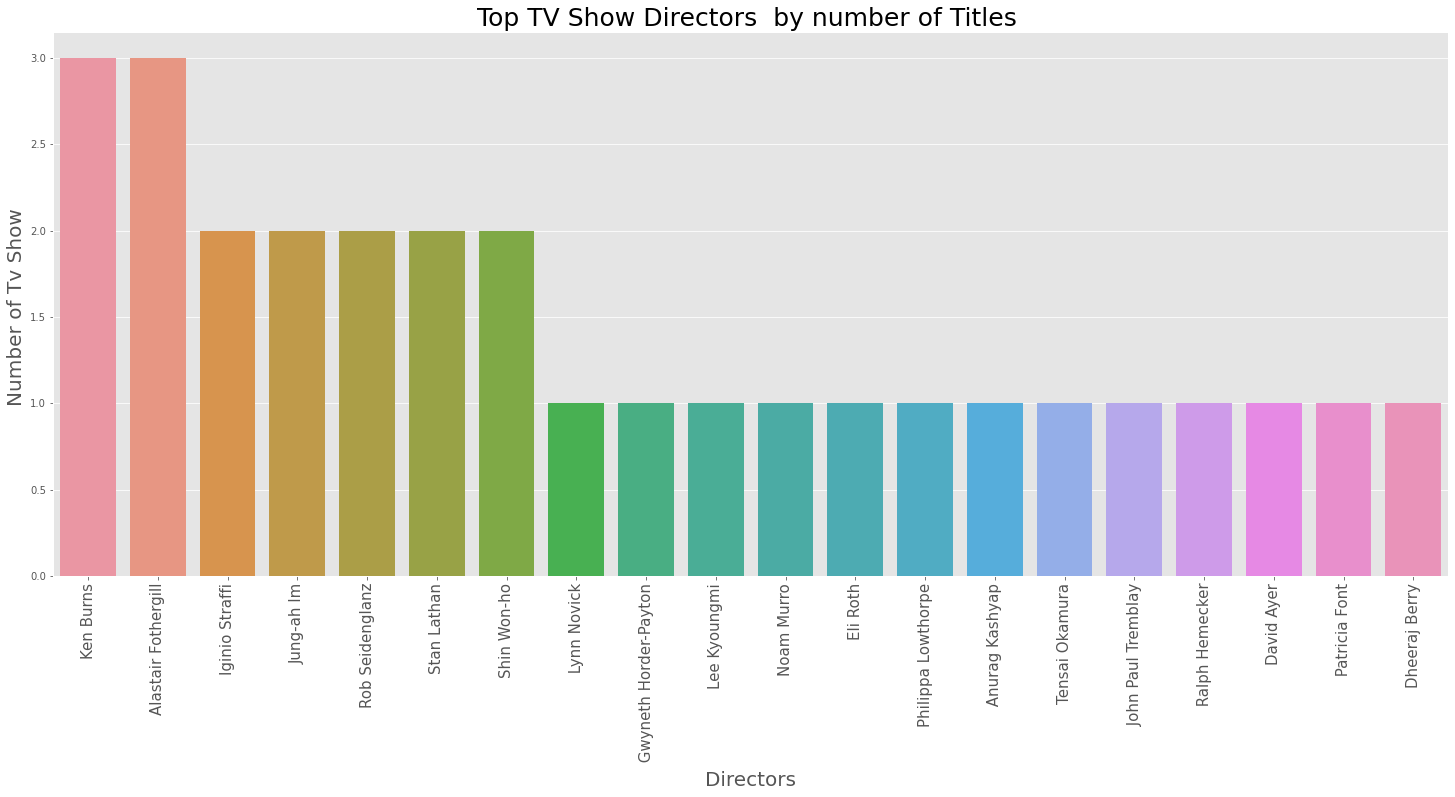

In [37]:
tv_show_director=tv_show_df.set_index("title")["director"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)
tv_show_director.value_counts()
plt.figure(figsize=(25,10))
sns.barplot(tv_show_director.value_counts().keys()[1:21],tv_show_director.value_counts()[1:21])
plt.xticks(rotation=90,fontsize=15)
plt.title("Top TV Show Directors  by number of Titles ",fontsize=25)
plt.xlabel("Directors",fontsize=20)
plt.ylabel("Number of Tv Show ",fontsize=20)
plt.show()

### Alastair Fothergill And Ken Bums are most contributing directors in Tv Shows.

## Indian Movie directors with most contribution

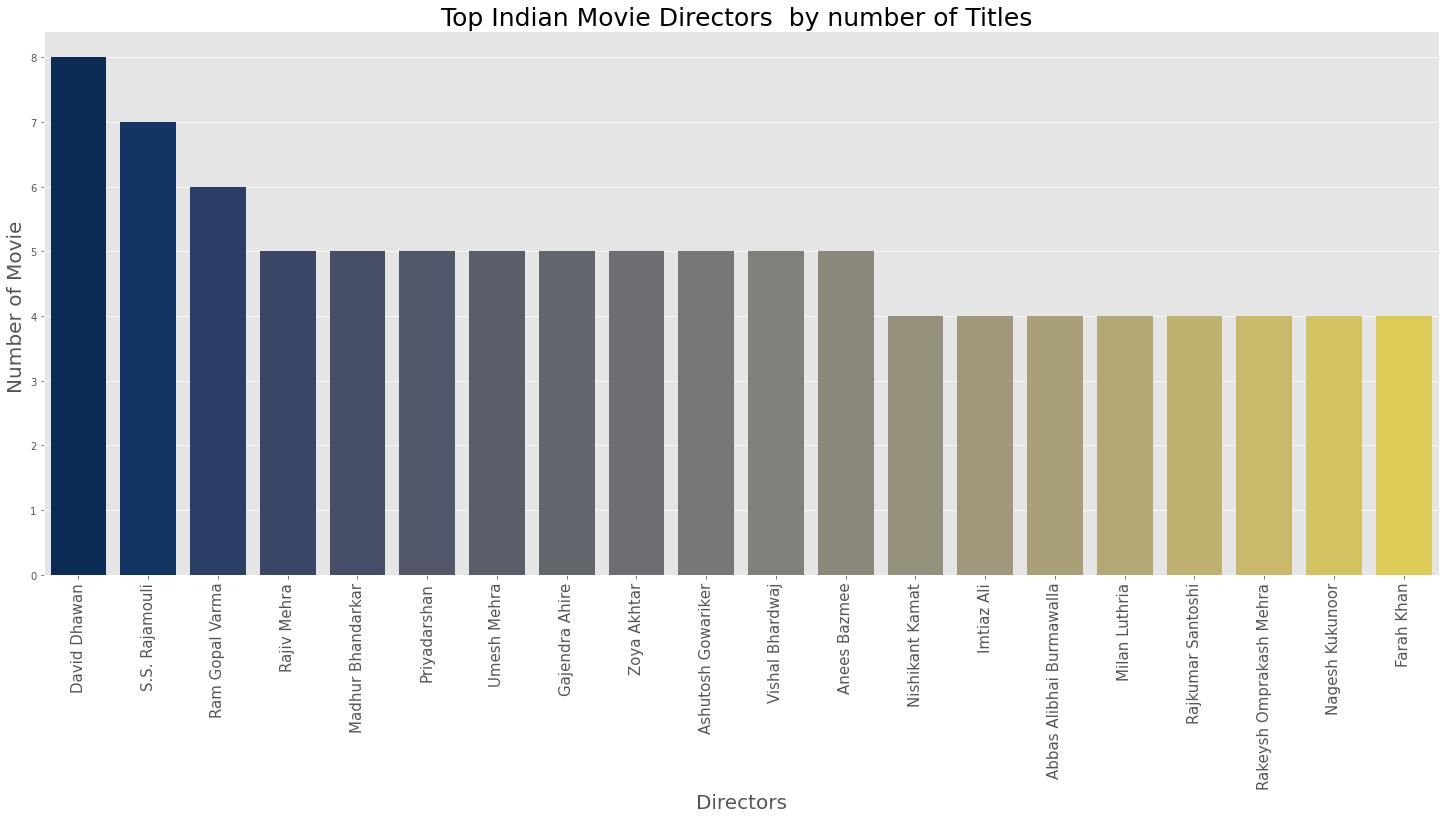

In [38]:
indian_movie_df=movie_df[movie_df["country"]=="India"]
indian_movie_directors=indian_movie_df.set_index("title")["director"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(25,10))
sns.barplot(indian_movie_directors.value_counts().keys()[1:21],indian_movie_directors.value_counts()[1:21],palette="cividis")
plt.xticks(rotation=90,fontsize=15)
plt.title("Top Indian Movie Directors  by number of Titles ",fontsize=25)
plt.xlabel("Directors",fontsize=20)
plt.ylabel("Number of Movie ",fontsize=20)
plt.show()


### David Dhawan And S.S. Rajamouli  are most contributing Indian directors in Tv Movies.

## Indian TV Show Directors With most Contribution

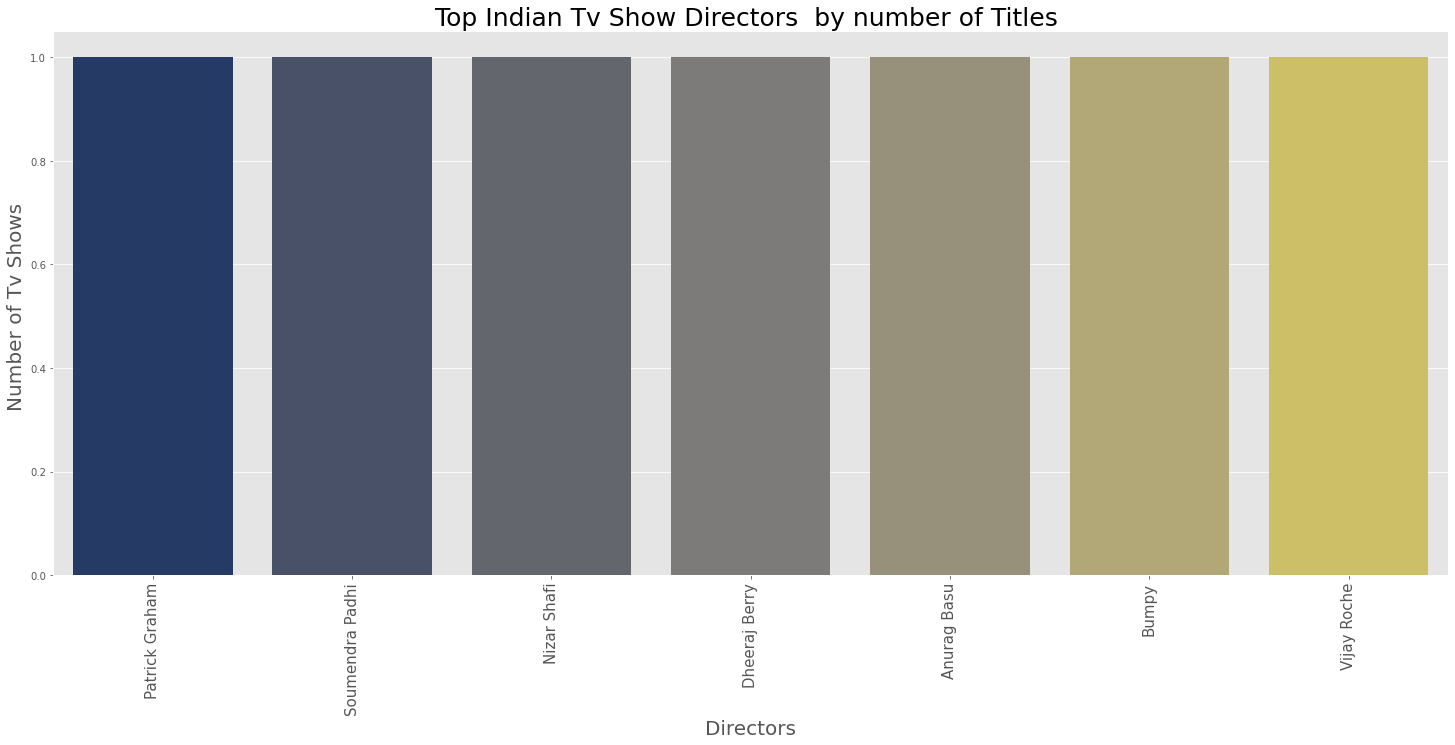

In [39]:
indian_tv_show_df=tv_show_df[tv_show_df["country"]=="India"]
indian_tv_show_directors=indian_tv_show_df.set_index("title")["director"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)
indian_tv_show_directors.value_counts()
plt.figure(figsize=(25,10))
sns.barplot(indian_tv_show_directors.value_counts().keys()[1:21],indian_tv_show_directors.value_counts()[1:21],palette="cividis")
plt.xticks(rotation=90,fontsize=15)
plt.title("Top Indian Tv Show Directors  by number of Titles ",fontsize=25)
plt.xlabel("Directors",fontsize=20)
plt.ylabel("Number of Tv Shows ",fontsize=20)
plt.show()

### Patric Graham , Bumpy , Nizar Shafi , Vjay Roche ,Dheeraj berry ,Anurag Basu and Soumendra padhi are only  contributing directors in IndianTv Shows on Netflix.

# Cast

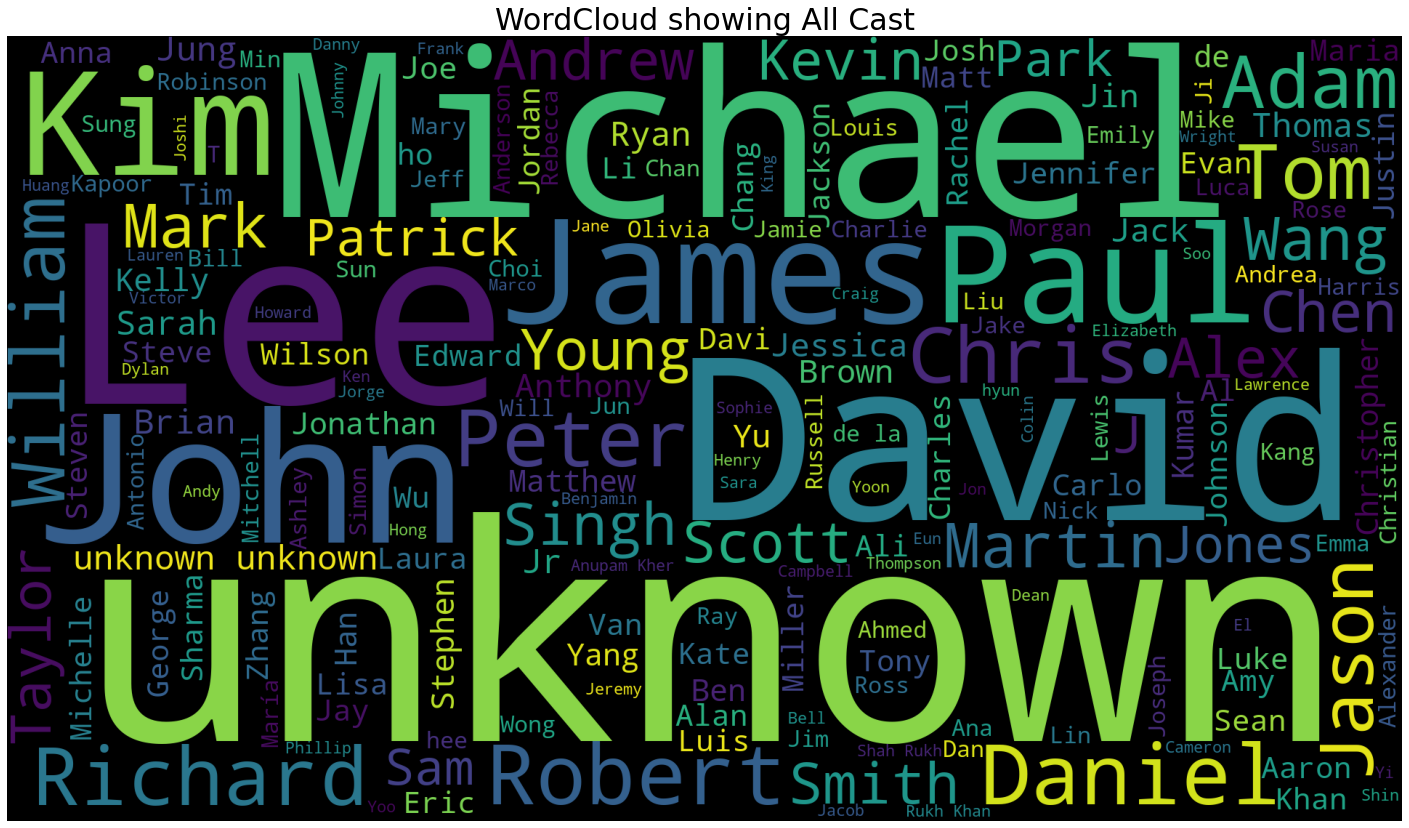

In [40]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(final_df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud showing All Cast",fontsize=30)
plt.savefig('country.png')
plt.show()

## Top Movie Cast

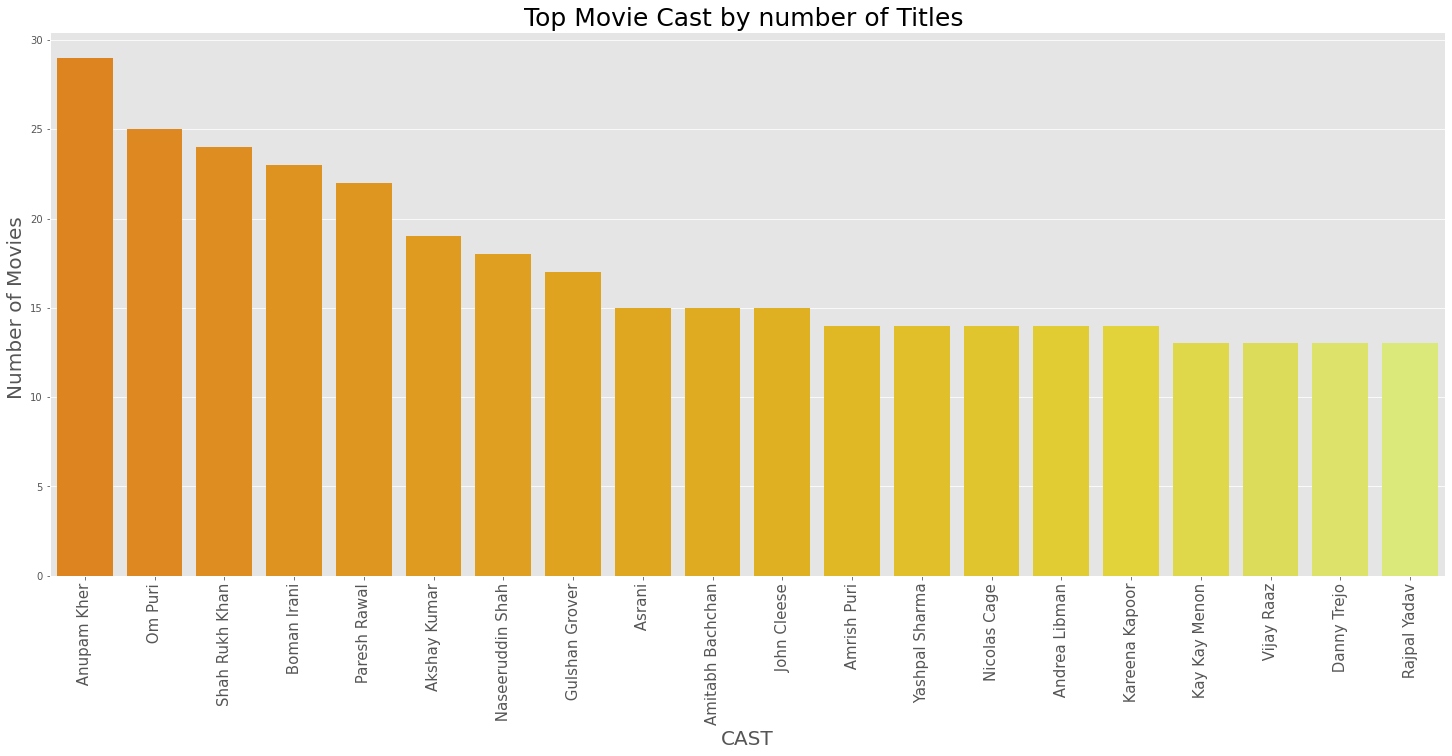

In [41]:
top_movie_cast=movie_df.set_index("title")["cast"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)
top_movie_cast.value_counts()
plt.figure(figsize=(25,10))
sns.barplot(top_movie_cast.value_counts().keys()[1:21],top_movie_cast.value_counts()[1:21],palette="Wistia_r")
plt.xticks(rotation=90,fontsize=15)
plt.title("Top Movie Cast by number of Titles ",fontsize=25)
plt.xlabel("CAST",fontsize=20)
plt.ylabel("Number of Movies ",fontsize=20)
plt.show()

### In Movies, Indian Actors are contributing more in numbers : Anupam Kher is top followed by Om Puri. 

## Top TV Show Cast

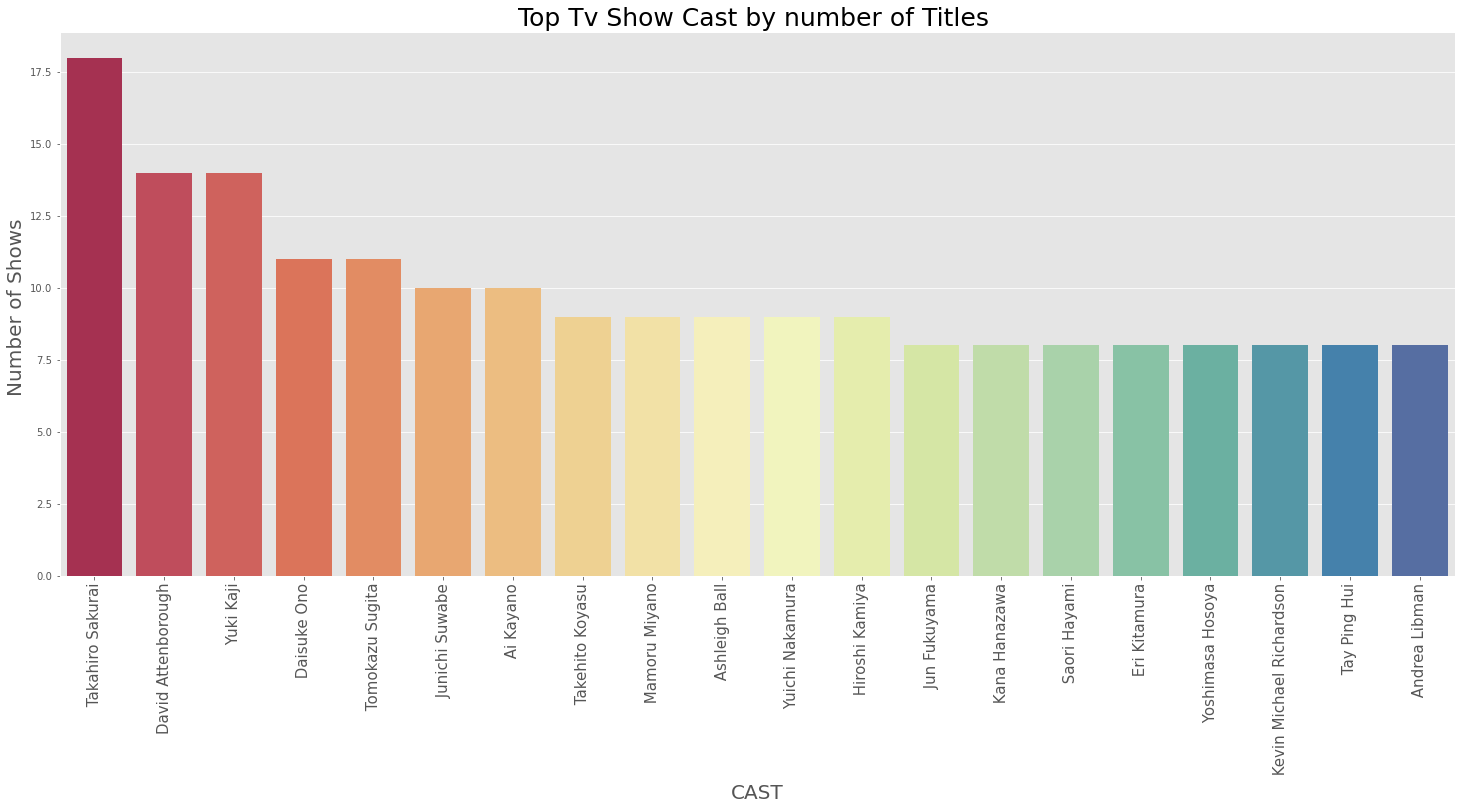

In [42]:
top_tv_show_cast=tv_show_df.set_index("title")["cast"].str.split(",",expand=True).stack().reset_index(level=1,drop=True)
top_tv_show_cast.value_counts()
plt.figure(figsize=(25,10))
sns.barplot(top_tv_show_cast.value_counts().keys()[1:21],top_tv_show_cast.value_counts()[1:21],palette="Spectral")
plt.xticks(rotation=90,fontsize=15)
plt.title("Top Tv Show Cast by number of Titles ",fontsize=25)
plt.xlabel("CAST",fontsize=20)
plt.ylabel("Number of Shows ",fontsize=20)
plt.show()

### In Tv Shows,Takahiro Sakurai is on top by number of titles.

# End Of Notebook